# RiceLeaf disease detection


## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of
rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a
report on that.

### Import all the necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



##### UnZipping the data from stored in zip format

In [8]:
! unzip /content/data_rld_zip.zip

Archive:  /content/data_rld_zip.zip
   creating: data_rld/
   creating: data_rld/Bacterial leaf blight/
  inflating: data_rld/Bacterial leaf blight/DSC_0365.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0366.jpg  
  inflating: data_rld/Bacterial leaf blight/DSC_0367.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0370.jpg  
  inflating: data_rld/Bacterial leaf blight/DSC_0372.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0373.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0374.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0375.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0376.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0377.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0378.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0379.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0380.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0381.JPG  
  inflating: data_rld/Bacterial leaf blight/DSC_0382.JPG  
  inflating

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/data_rld',
    shuffle=True,
    image_size = (256, 256),
    batch_size = 32
)


Found 119 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names

class_names

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [13]:
print("No.of Batches:",len(dataset))   # 119/32 = 4

No.of Batches: 4


In [14]:

for image_batch, labels_batch in dataset.take(1): # Retrieves the first batch from the dataset
  print(image_batch.shape)  # Contains the images in the batch
  print(labels_batch.numpy()) # Contains the labels corresponding to those images

# 32: The number of images in this batch.
# 256x256: The dimensions of each image (height and width).
# 3: The number of color channels (RGB) in each image.


(32, 256, 256, 3)
[1 0 0 2 1 1 1 1 0 2 1 0 2 1 2 1 1 2 0 0 1 1 0 1 1 1 0 1 2 2 0 0]


In [15]:
# Printing Images
plt.figure(figsize=(20,20))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8")) # Ensures the pixel values are in the 0-255 range and formatted as 8-bit unsigned integers, which is a standard format for image data.
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Train_test_split

80% for training
20% for testing, 10% for validation



# Total Dataset Splitting:
# Training Set: 80% of the entire dataset
# Validation Set: 10% of the entire Batch, our's is 32
# Test Set: 10% of the entire Batch, our's is 32

In [20]:
# Calculate the number of batches

batch_size = 32
dataset_size = 119  # Total number of images
total_batches = dataset_size // batch_size
total_batches




3

#### MODEL BUILDING

In [21]:
# Create the train and validation datasets (80% train)


train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/data_rld',
    validation_split=0.2,  # Reserve 20% for validation+testing
    subset="training",
    seed=123,
    image_size=(256,256),
    batch_size=32
)

Found 119 files belonging to 3 classes.
Using 96 files for training.


In [22]:
# Step 2: Further split the 20% into 10% validation and 10% testing

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'//content/data_rld',
    validation_split=0.5,  # 50% of the 20% = 10% of the total dataset for validation
    subset="validation",
    seed=123,
    image_size=(256,256),
    batch_size=32
)

Found 119 files belonging to 3 classes.
Using 59 files for validation.


In [23]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/data_rld',
    validation_split=0.5,  # The other 50% of the 20% = 10% of the total dataset for testing
    subset="validation",
    seed=123,
    image_size=(256,256),
    batch_size=32
)

Found 119 files belonging to 3 classes.
Using 59 files for validation.


In [24]:
# Define image preprocessing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])

#### DATA AUGMENTATION

In [25]:
# Data Augmentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
#Layers:

 # 1.Convolutional Layer (Conv2D)
 # 2.Pooling Layer (MaxPooling2D)
 #3.Fully Connected (Dense) Layer
 #4.Output Layer

#### MODEL

In [26]:
# Define the model

model = models.Sequential([
    # Convolutional layer with 32 filters, 3x3 kernel size, ReLU activation

    layers.Conv2D(
        filters=32,                   # Number of output filters
        kernel_size=(3, 3),           # Size of the convolutional kernel
        activation='relu',            # Activation function
        input_shape=(256, 256, 3)     # Input shape (height, width, channels)
    ),
    # MaxPooling layer to reduce spatial dimensions
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Add more Conv2D and MaxPooling layers as needed
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

        # Add more Conv2D and MaxPooling layers as needed
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output to feed into Dense layers
    layers.Flatten(),

    # Fully connected Dense layer
    layers.Dense(64, activation='relu'),

    # Output layer with 15 classes
    layers.Dense(15, activation='softmax')   # Output layer with 15 neurons for classification

])

In [27]:
# Compile the model
model.compile(
    optimizer='adam',                  # Optimizer
    loss='sparse_categorical_crossentropy', # Loss function for classification
    metrics=['accuracy']               # Metrics to evaluate the model
)

In [28]:
# Print model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)       

In [29]:
# Training the Network

history = model.fit(
    train_dataset,
    epochs=10,
    batch_size=32,
    validation_data=validation_dataset,
    verbose=1
)

Epoch 1/10
3/3 [==============================] - 3s 662ms/step - loss: 203.6475 - accuracy: 0.2708 - val_loss: 454.3470 - val_accuracy: 0.3051
Epoch 2/10
3/3 [==============================] - 2s 593ms/step - loss: 183.0246 - accuracy: 0.3750 - val_loss: 54.6597 - val_accuracy: 0.3729
Epoch 3/10
3/3 [==============================] - 2s 591ms/step - loss: 28.9395 - accuracy: 0.3438 - val_loss: 10.1041 - val_accuracy: 0.5085
Epoch 4/10
3/3 [==============================] - 2s 590ms/step - loss: 12.0674 - accuracy: 0.4792 - val_loss: 6.3100 - val_accuracy: 0.3729
Epoch 5/10
3/3 [==============================] - 2s 573ms/step - loss: 2.8419 - accuracy: 0.5417 - val_loss: 1.4648 - val_accuracy: 0.4576
Epoch 6/10
3/3 [==============================] - 2s 579ms/step - loss: 0.9775 - accuracy: 0.6146 - val_loss: 1.2130 - val_accuracy: 0.5593
Epoch 7/10
3/3 [==============================] - 2s 540ms/step - loss: 0.7997 - accuracy: 0.7292 - val_loss: 0.7904 - val_accuracy: 0.6780
Epoch 8/10

In [30]:
scores = model.evaluate(test_dataset)

scores

2/2 [==============================] - 0s 74ms/step - loss: 0.7772 - accuracy: 0.7966


[0.7771626114845276, 0.7966101765632629]

### Model Gave 79.66% Accuracy

In [31]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 3}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

loss = history.history['loss']
valid_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

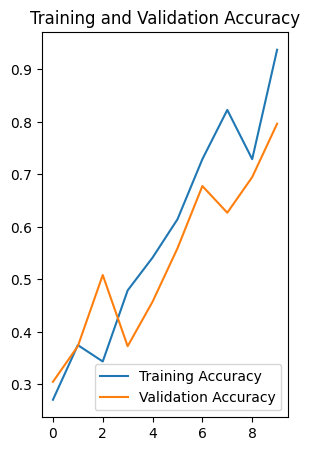

In [34]:
EPOCHS = 10


plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),valid_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


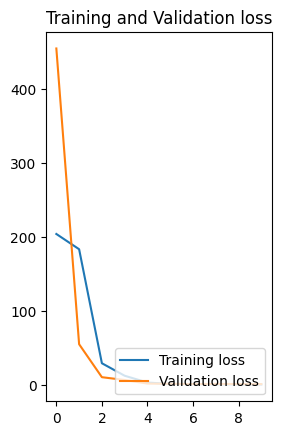

In [35]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),valid_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')
plt.show()

#### Saving The Model

In [ ]:
model.save('cnn_model.h5')

print("CNN model saved as cnn_model.pkl")
